In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gudhi as gd

In [2]:
import bifiltrations_alpha as alpha

## Load an example pointcloud

In [3]:
points = pd.read_csv('test.csv')
points

,x,y
0,0.023961,0.255004
1,0.006801,0.521060
2,0.008416,0.572379
3,0.011830,1.000807
4,0.013884,1.480515
...,...,...
195,0.340302,0.988873
196,0.333690,0.413129
197,0.332858,0.585402
198,0.342905,1.350858


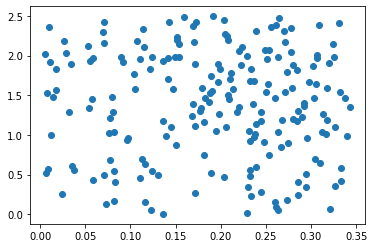

In [4]:
plt.scatter(points.x, points.y)

## Alpha ECC

In [5]:
# compute the contributions to the ECC
ecc_contributions, num_simplices = alpha.compute_ECC_contributions_alpha(points.values)
print('{} simplices found'.format(num_simplices))

1163 simplices found


In [6]:
# ecc_contributions is a list of tuples (filtration, contribution)
ecc_contributions[:5]

[(0.0, 200),
 (7.041682812500026e-06, -1),
 (7.156603124999771e-06, -1),
 (8.63939824999987e-06, -1),
 (1.493543538223128e-05, -1)]

In [7]:
ecc_contributions[-5:]

[(0.007119390929117472, -1),
 (0.007127660604852669, 1),
 (0.007449389441383444, 1),
 (0.007534635085341463, 1),
 (0.008767324317016385, 1)]

In [8]:
# we can obtain the ECC by progressively summing up all the contributions
ecc = alpha.ECC_from_contributions(ecc_contributions)

In [9]:
# now we have a list of tuples (filtration, euler characteristic)
ecc[:5]

[[0.0, 200],
 [7.041682812500026e-06, 199],
 [7.156603124999771e-06, 198],
 [8.63939824999987e-06, 197],
 [1.493543538223128e-05, 196]]

In [10]:
# we are building up the whole alpha complex, so at the largest filtration
# value the euler characteristic is 1 (one big connected component)
# now we have a list of tuples (filtration, euler characteristic)
ecc[-5:]

[[0.007119390929117472, -3],
 [0.007127660604852669, -2],
 [0.007449389441383444, -1],
 [0.007534635085341463, 0],
 [0.008767324317016385, 1]]

<AxesSubplot:xlabel='Filtration', ylabel='Euler Characteristic'>

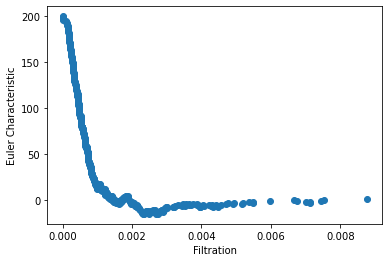

In [11]:
# we can plot the ECC
fig, ax = plt.subplots(1)
alpha.plot_ECC(ecc, this_ax=ax, with_lines=False)

## Alpha ECP

In [12]:
# lets add a second filtration
from scipy.spatial import distance_matrix

def kNN_filter(points, kNN):
    D = distance_matrix(points, points)
    sortedD = np.sort(D)
    codensity = np.sum(sortedD[:, :kNN+1], axis=1)
    return codensity

In [13]:
# we define a codensity for each point as the sum 
# of the distances from its 10 nearest neighbor
vertex_codensity = kNN_filter(points.values, 10)
vertex_codensity[:5]

array([1.75506256, 0.94011483, 0.97267567, 1.4350677 , 1.23328143])

In [14]:
# we compute a bidemensional ECP
# the codensity of a simplex is the maximum codensity over its vertices
ecp_contributions, num_simplex = alpha.compute_ECP_contributions_alpha(points.values, vertex_codensity)
print('{} simplices found'.format(num_simplices))

1163 simplices found


In [15]:
# ecp_contributions is a list of tuples ((f1, f2), contribution)
ecp_contributions[:5]

[((0.0, 0.4650633220756959), 1),
 ((0.0, 0.49349275341903864), 1),
 ((0.0, 0.5288329995539428), 1),
 ((0.0, 0.5371755181444691), 1),
 ((0.0, 0.537944883537042), 1)]

In [16]:
# note that we have non-zero contributions at points
# very far from the origin
ecp_contributions[-5:]

[((153.0552140428697, 1.2905669114270353), 1),
 ((775.3113076175556, 1.2613626146768304), -1),
 ((775.3113076175556, 1.4350677007008272), 1),
 ((23681.64281604215, 1.0025472088408711), -1),
 ((23681.64281604215, 1.2613626146768304), 1)]

<AxesSubplot:xlabel='Filtration 1', ylabel='Filtration 2'>

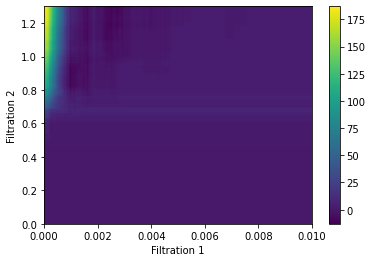

In [17]:
# we can plot the ECP
# we need to specify a plotting range
# WARNING: can take a bit with large ecp_contributions
fig, ax = plt.subplots(1)
alpha.plot_ECP(ecp_contributions, 
               ranges=(0, 0.01, 0, 1.3), # (f1_min, f1_max, f2_min, f2_max)
               this_ax=ax, 
               colorbar=True)

## Vectorizing

(50,)


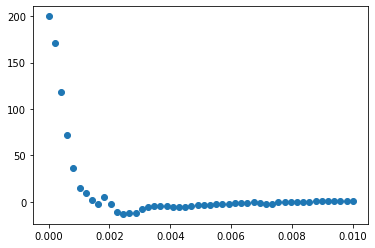

In [30]:
# if we want fixed lenght np.arrays to plug into our favourite ML pipeline
# we can subsample the ECCs, ECPs

vect_ecc = alpha.subsample_ECC(ecc_contributions, 
                               f_range=(0, 0.01), # (f_min, f_max)
                               size=50)
print(vect_ecc.shape)

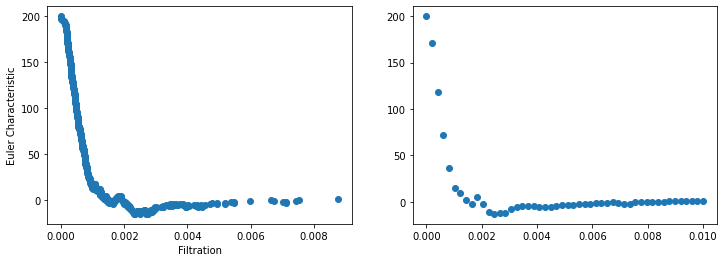

In [32]:
# we can plot the ECC and the sampled version
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
alpha.plot_ECC(ecc, this_ax=ax[0], with_lines=False)

f_range=(0, 0.01)
ax[1].scatter(np.linspace(f_range[0], f_range[1], num=vect_ecc.shape[0]),
           vect_ecc)

In [33]:
vect_ecp = alpha.subsample_ECP(ecp_contributions, 
                               f1_range=(0, 0.01), # (f1_min, f1_max)
                               f2_range=(0, 1.3),  # (f2_min, f2_max)
                               size=(20, 30))
print(vect_ecp.shape)

(20, 30)


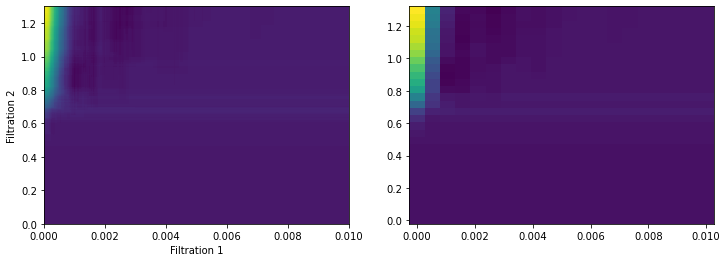

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

alpha.plot_ECP(ecp_contributions, 
               ranges=(0, 0.01, 0, 1.3), # (f1_min, f1_max, f2_min, f2_max)
               this_ax=ax[0], 
               colorbar=False)

f1_range=(0, 0.01) # (f1_min, f1_max)
f2_range=(0, 1.3)  # (f2_min, f2_max)

ax[1].pcolormesh(np.linspace(f1_range[0], f1_range[1], num=vect_ecp.shape[0]),
               np.linspace(f2_range[0], f2_range[1], num=vect_ecp.shape[1]),
               vect_ecp.T)